In [42]:
pip install chardet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
import chardet

In [44]:
file_path = 'student.csv'

In [45]:
# 檢測檔案編碼
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

In [46]:
try:
    df_csv = pd.read_csv(file_path, encoding=result['encoding'])
    print("檔案讀取成功！")
except UnicodeDecodeError:
    print("無法使用檢測到的編碼讀取檔案。請手動指定正確的編碼。")
except Exception as e:
    print(f"發生錯誤: {e}")

檔案讀取成功！


In [47]:
df_csv

,name,math grade,chinese grade
0,高田地,95,70
1,盧彥翔,70,80
2,王秉岳,55,60
3,莊子毅,60,95
4,張禕宸,45,90
5,陳宥紳,67,66
6,吳婕寧,85,95
7,柯杰佑,65,80
8,楊子傑,45,60
9,李維紘,90,91


In [48]:
students_set = set(df_csv['name'])
math_students_set = set(df_csv[df_csv['math grade'] >= 80]['name'])
chinese_students_set = set(df_csv[df_csv['chinese grade'] >= 80]['name'])

In [49]:
#聯集，所有國文數學優秀的學生
union_set = students_set.union(math_students_set, chinese_students_set)

In [50]:
#交集，兩科都很優秀
intersection_set = students_set.intersection(math_students_set, chinese_students_set)

In [51]:
#差集、兩科都不好
difference_set = students_set.difference(math_students_set, chinese_students_set)

In [52]:
#將成績大於80分設為優秀等級，數學80分以上的人有11位，國文80分以上的人有17位，由此資料可以了解到本班的語文能力比數理能力好，甚至兩科都很優秀的人共計7位，分別是陳宥珈,何仲軒,李維紘,陳子謀,張瑋庭,吳婕寧,鐘王誠
print(f'全體學生: {students_set}')
print(f'數學優秀學生: {math_students_set}')
print(f'國文優秀學生: {chinese_students_set}')
print(f'所有國文數學優秀的學生: {union_set}')
print(f'兩科都很優秀: {intersection_set}')
print(f'兩科都不好: {difference_set}')

全體學生: {'陳子謀', '何仲軒', '盧彥翔', '張瑋庭', '江玠慶', '陳宥紳', '王秉岳', '吳宥宏', '陳韋誠', '吳婕寧', '楊浩羽', '柯杰佑', '李維紘', '陳宥珈', '柯安安', '黃楷互', '張禕宸', '楊子傑', '莊子毅', '張禕秦', '張旨諒', '邵令仲', '邱柏堯', '高田地', '鐘王誠', '李皓威'}
數學優秀學生: {'黃楷互', '陳子謀', '何仲軒', '張瑋庭', '高田地', '吳婕寧', '江玠慶', '鐘王誠', '李維紘', '陳宥珈', '柯安安'}
國文優秀學生: {'張禕秦', '張禕宸', '張旨諒', '吳宥宏', '陳子謀', '陳韋誠', '盧彥翔', '邱柏堯', '莊子毅', '何仲軒', '鐘王誠', '吳婕寧', '張瑋庭', '柯杰佑', '李維紘', '陳宥珈', '李皓威'}
所有國文數學優秀的學生: {'陳子謀', '何仲軒', '盧彥翔', '張瑋庭', '江玠慶', '陳宥紳', '王秉岳', '吳宥宏', '陳韋誠', '吳婕寧', '楊浩羽', '柯杰佑', '李維紘', '陳宥珈', '柯安安', '黃楷互', '張禕宸', '楊子傑', '莊子毅', '張禕秦', '張旨諒', '邵令仲', '邱柏堯', '高田地', '鐘王誠', '李皓威'}
兩科都很優秀: {'陳子謀', '何仲軒', '張瑋庭', '吳婕寧', '鐘王誠', '李維紘', '陳宥珈'}
兩科都不好: {'王秉岳', '邵令仲', '楊子傑', '楊浩羽', '陳宥紳'}


In [53]:
import matplotlib.pyplot as plt

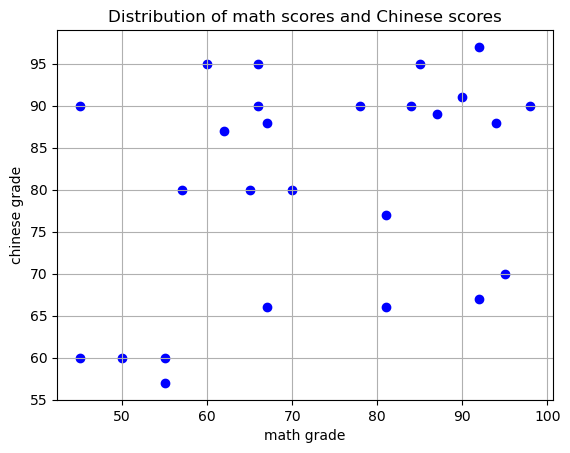

In [54]:
# 問題一，本班兩科的成績會呈現正相關嗎？會不會成績好的學生兩科都很好？
# 繪製散點圖，呈現國文與數學無明顯關係
plt.scatter(df_csv["math grade"], df_csv["chinese grade"], color='blue')
plt.xlabel('math grade')
plt.ylabel('chinese grade')
plt.title('Distribution of math scores and Chinese scores')
plt.grid(True)
plt.show()

In [55]:
# 設置數據
math_grades = df_csv['math grade']
chinese_grades = df_csv['chinese grade']

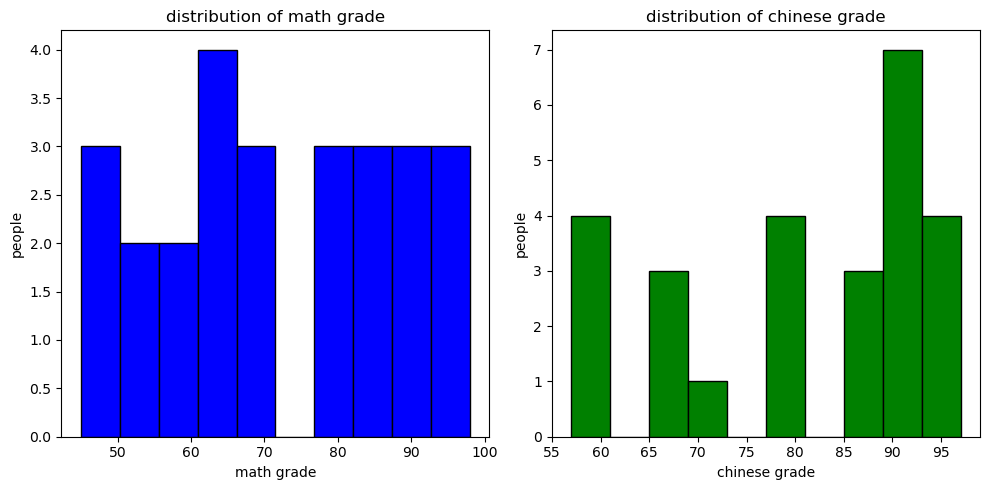

In [56]:
# 繪製長條圖
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(math_grades, bins=10, color='blue', edgecolor='black')
plt.xlabel('math grade')
plt.ylabel('people')
plt.title('distribution of math grade')

plt.subplot(1, 2, 2)
plt.hist(chinese_grades, bins=10, color='green', edgecolor='black')
plt.xlabel('chinese grade')
plt.ylabel('people')
plt.title('distribution of chinese grade')

plt.tight_layout()
plt.show()

In [57]:
# 設置數據
math_pass_count = len(df_csv[df_csv['math grade'] >= 60])
math_fail_count = len(df_csv[df_csv['math grade'] < 60])
chinese_pass_count = len(df_csv[df_csv['chinese grade'] >= 60])
chinese_fail_count = len(df_csv[df_csv['chinese grade'] < 60])

In [58]:
# 數據標籤
labels_math = ['pass', 'fail']
sizes_math = [math_pass_count, math_fail_count]
colors_math = ['lightblue', 'lightcoral']
explode_math = (0.1, 0)  # 突出顯示及格和不及格的部分

labels_chinese = ['pass', 'fail']
sizes_chinese = [chinese_pass_count, chinese_fail_count]
colors_chinese = ['lightgreen', 'lightsalmon']
explode_chinese = (0.1, 0)  # 突出顯示及格和不及格的部分

Text(0.5, 1.0, 'chinese grade')

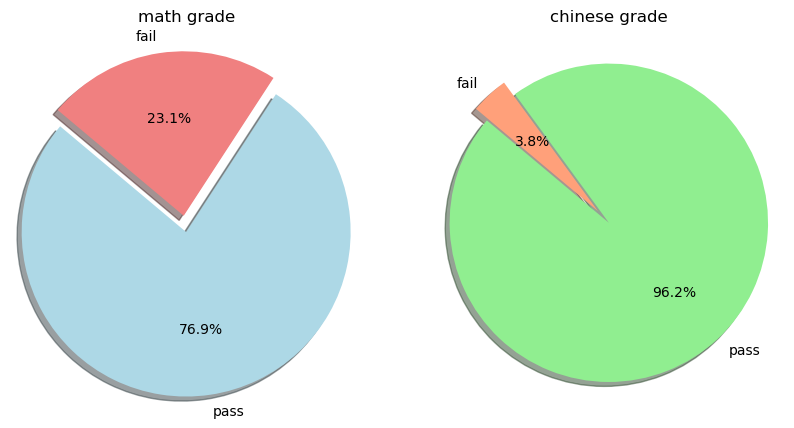

In [59]:
#問題二，本班的語文能力好還是數理能力好？
# 繪製第一個圓餅圖 (數學成績)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes_math, explode=explode_math, labels=labels_math, colors=colors_math, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # 使圓餅圖比例相等
plt.title('math grade')

# 繪製第二個圓餅圖 (中文成績)
plt.subplot(1, 2, 2)
plt.pie(sizes_chinese, explode=explode_chinese, labels=labels_chinese, colors=colors_chinese, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # 使圓餅圖比例相等
plt.title('chinese grade')

#說明本班的語文能力較佳

In [60]:
#導入第二班的資料
file_path2 = 'class 2.csv'

In [61]:
# 檢測檔案編碼
import pandas as pd
import chardet
with open(file_path2, 'rb') as f:
    result = chardet.detect(f.read())

In [62]:
try:
    df_csv2 = pd.read_csv(file_path2, encoding=result['encoding'])
    print("檔案讀取成功！")
except UnicodeDecodeError:
    print("無法使用檢測到的編碼讀取檔案。請手動指定正確的編碼。")
except Exception as e:
    print(f"發生錯誤: {e}")

檔案讀取成功！


In [63]:
df_csv2

,name,math grade,chinese grade
0,陳勁佑,90,70
1,李姝靜,85,90
2,許幸婕,77,66
3,陳昱瑋,84,78
4,郭哲瑜,80,85
5,蔡秉叡,66,99
6,莊定洋,58,87
7,林棋業,95,98
8,楊弘宇,88,89
9,林劭潔,86,90


In [64]:
# 為每個 DataFrame 添加一個 'Class' 列，分別標註班級
df_csv['class'] = 'class 1'
df_csv2['class'] = 'class 2'

In [65]:
# 合併兩個 DataFrame
merged_df = pd.concat([df_csv, df_csv2])

In [66]:
merged_df

,name,math grade,chinese grade,class
0,高田地,95,70,class 1
1,盧彥翔,70,80,class 1
2,王秉岳,55,60,class 1
3,莊子毅,60,95,class 1
4,張禕宸,45,90,class 1
5,陳宥紳,67,66,class 1
6,吳婕寧,85,95,class 1
7,柯杰佑,65,80,class 1
8,楊子傑,45,60,class 1
9,李維紘,90,91,class 1


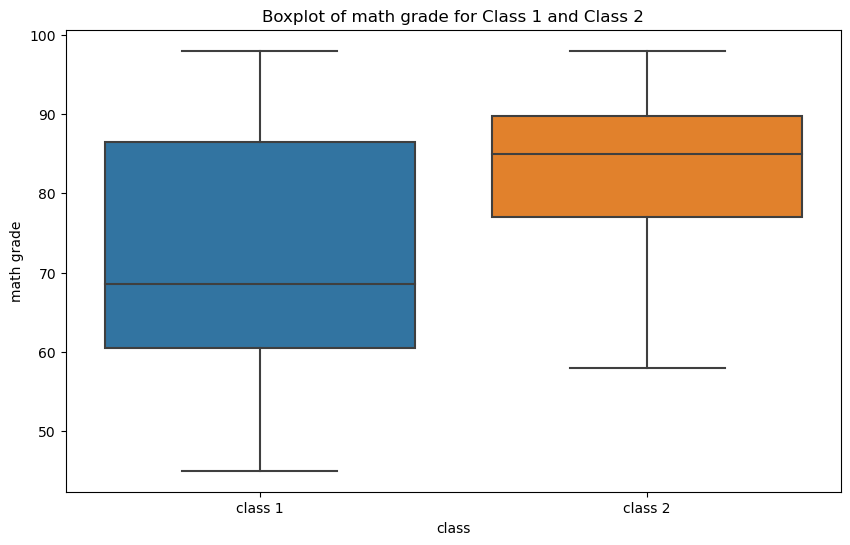

In [69]:
# 使用 Seaborn 繪製盒狀圖
# 我想知道class1與class2哪個班級的數理能力比較好？
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='class', y='math grade')
plt.xlabel('class')
plt.ylabel('math grade')
plt.title('Boxplot of math grade for Class 1 and Class 2')
plt.show()

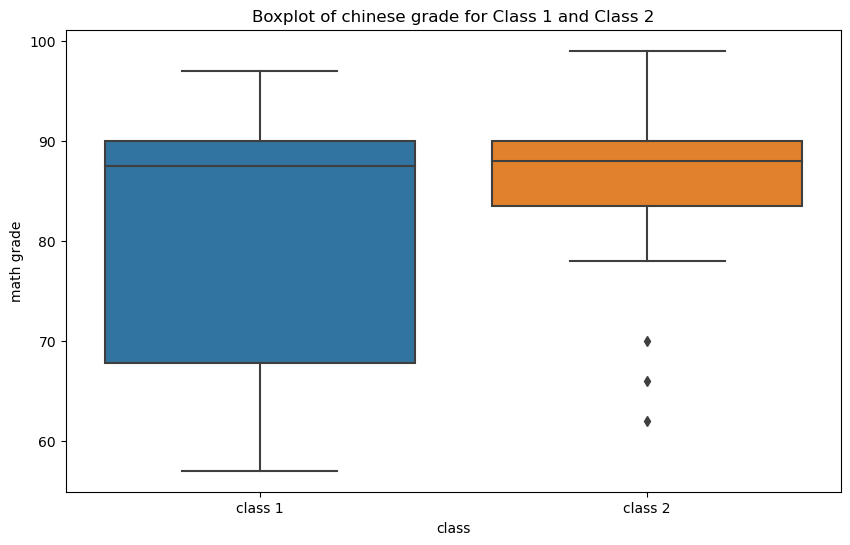

In [70]:
# 使用 Seaborn 繪製盒狀圖
# 我想知道class1與class2哪個班級的語文能力比較好？
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='class', y='chinese grade')
plt.xlabel('class')
plt.ylabel('math grade')
plt.title('Boxplot of chinese grade for Class 1 and Class 2')
plt.show()